#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['MSE'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [24]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 182s 5ms/step - loss: 0.3248 - mean_squared_error: 0.0899 - val_loss: 0.3224 - val_mean_squared_error: 0.0895
Epoch 2/12
37500/37500 [==============================] - 175s 5ms/step - loss: 0.3215 - mean_squared_error: 0.0893 - val_loss: 0.3203 - val_mean_squared_error: 0.0891
Epoch 3/12
37500/37500 [==============================] - 179s 5ms/step - loss: 0.3181 - mean_squared_error: 0.0887 - val_loss: 0.3176 - val_mean_squared_error: 0.0886
Epoch 4/12
37500/37500 [==============================] - 177s 5ms/step - loss: 0.3140 - mean_squared_error: 0.0879 - val_loss: 0.3140 - val_mean_squared_error: 0.0879
Epoch 5/12
37500/37500 [==============================] - 186s 5ms/step - loss: 0.3089 - mean_squared_error: 0.0868 - val_loss: 0.3094 - val_mean_squared_error: 0.0870
Epoch 6/12
37500/37500 [==============================] - 178s

In [31]:
train_history.history

{'val_loss': [0.32240452600479125,
  0.3203330096626282,
  0.3176030655384064,
  0.31397706295967104,
  0.30939392526626586,
  0.30491623480796815,
  0.3008329095077515,
  0.2975078432941437,
  0.29472573581695555,
  0.2927249660682678,
  0.2908613925552368,
  0.28901417994499207],
 'val_mean_squared_error': [0.0895044585442543,
  0.08911460766553879,
  0.08858962087392808,
  0.08788729866266251,
  0.08695930536270141,
  0.08607751492500305,
  0.08523669595241547,
  0.08454286539077759,
  0.08392115515232086,
  0.08347502168655395,
  0.08305045686483384,
  0.08259802978515625],
 'loss': [0.3247542406972249,
  0.3215292599137624,
  0.3181467433770498,
  0.31402670260747273,
  0.3089127590497335,
  0.30347299664179483,
  0.29852043405214945,
  0.29452016742070514,
  0.2916736101436615,
  0.2891896548652649,
  0.2868792404460907,
  0.28532210293451943],
 'mean_squared_error': [0.08994308975378672,
  0.08933654883464177,
  0.08867813375234604,
  0.08787337838172912,
  0.08684717147429784,


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_mse,test_mse):
    plt.plot(train_history.history[train_mse])
    plt.plot(train_history.history[test_mse])
    plt.title('Train History')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train_mse', 'val_mse'], loc='upper left')
    plt.show()

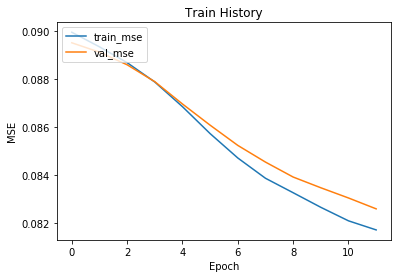

In [33]:
show_train_history('mean_squared_error','val_mean_squared_error')